In [3]:
 !pip install numpy pandas matplotlib seaborn

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [10]:
df = df.drop("ISO 3166-1 alpha-3", axis=1)

In [11]:
df


,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [12]:
# check for missing values 
df.isna().any()

Country       False
Year          False
Total          True
Coal           True
Oil            True
Gas            True
Cement         True
Flaring        True
Other          True
Per Capita     True
dtype: bool

In [14]:
df.fillna(0, inplace=True)

In [19]:
transport_data = df[
    ( df["Country"] == "International Transport") |
    ( df["Country"] == "Global")
]
transport_data["Country"].unique()

array(['International Transport', 'Global'], dtype=object)

In [20]:
df= df[~df["Country"].isin(transport_data["Country"])]

In [ ]:
# Insight 1: Top 10 counteries in terms of total emission over the time 

In [22]:
df.groupby("Country").sum()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Afghanistan,512856,217.993073,57.676473,131.577257,20.266629,2.516676,5.956043,0.0,10.906441
Albania,512856,293.838988,66.781780,185.838389,16.707287,24.375176,0.136357,0.0,103.493067
Algeria,512856,4862.566823,117.541470,1653.701878,2154.349422,243.216837,693.757211,0.0,170.061697
Andorra,512856,15.484492,0.000000,15.484492,0.000000,0.000000,0.000000,0.0,222.465912
Angola,512856,657.115491,1.600747,346.826407,46.112038,26.090758,236.485539,0.0,39.175331
...,...,...,...,...,...,...,...,...,...
Viet Nam,512856,4623.865636,2266.975955,1408.498211,310.350739,620.706079,17.334650,0.0,56.590739
Wallis and Futuna Islands,512856,0.773031,0.000000,0.773031,0.000000,0.000000,0.000000,0.0,57.823454
Yemen,512856,651.596748,4.977337,595.083134,13.635112,23.039070,14.862096,0.0,42.646845


In [26]:
df.groupby("Country").sum().sort_values(by = "Total", ascending = False)




,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
USA,512856,421906.855203,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
China,512856,249352.817660,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,4899.551490,202.362414
Russia,512856,117547.631435,45571.473160,33219.817986,35054.214393,1659.173890,1486.447360,556.504640,803.008475
Germany,512856,93290.503809,64665.842957,19852.714039,7177.257730,1206.606673,93.573871,294.508547,1311.383670
United Kingdom,512856,78508.720102,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
...,...,...,...,...,...,...,...,...,...
Niue,512856,0.301987,0.000000,0.301987,0.000000,0.000000,0.000000,0.000000,134.408709
Tuvalu,512856,0.286818,0.000000,0.286818,0.000000,0.000000,0.000000,0.000000,28.371579
Puerto Rico,512856,0.208848,0.000000,0.208848,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
df.groupby("Country").sum().sort_values(by = "Total", ascending = False).index

Index(['USA', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan', 'India',
       'France', 'Canada', 'Ukraine',
       ...
       'Montserrat', 'Christmas Island', 'Wallis and Futuna Islands',
       'St. Kitts-Nevis-Anguilla', 'Saint Helena', 'Niue', 'Tuvalu',
       'Puerto Rico', 'Leeward Islands', 'Antarctica'],
      dtype='object', name='Country', length=230)

In [29]:
Countries = list(df.groupby("Country").sum().sort_values(by = "Total", ascending = False).index)

In [30]:
Countries

['USA',
 'China',
 'Russia',
 'Germany',
 'United Kingdom',
 'Japan',
 'India',
 'France',
 'Canada',
 'Ukraine',
 'Poland',
 'Italy',
 'South Africa',
 'Mexico',
 'Iran',
 'Australia',
 'South Korea',
 'Saudi Arabia',
 'Brazil',
 'Spain',
 'Indonesia',
 'Kazakhstan',
 'Belgium',
 'Czech Republic',
 'Netherlands',
 'Turkey',
 'Taiwan',
 'Romania',
 'Argentina',
 'Venezuela',
 'Thailand',
 'Egypt',
 'Uzbekistan',
 'Malaysia',
 'Austria',
 'Pakistan',
 'North Korea',
 'United Arab Emirates',
 'Hungary',
 'Sweden',
 'Belarus',
 'Algeria',
 'Iraq',
 'Viet Nam',
 'Greece',
 'Denmark',
 'Nigeria',
 'Slovakia',
 'Bulgaria',
 'Philippines',
 'Colombia',
 'Finland',
 'Switzerland',
 'Kuwait',
 'Chile',
 'Serbia',
 'Norway',
 'Portugal',
 'Azerbaijan',
 'Turkmenistan',
 'Israel',
 'Ireland',
 'Libya',
 'Qatar',
 'Singapore',
 'Peru',
 'New Zealand',
 'Syria',
 'Morocco',
 'Hong Kong',
 'Bangladesh',
 'Estonia',
 'Cuba',
 'Trinidad and Tobago',
 'Lithuania',
 'Oman',
 'Moldova',
 'Ecuador',
 'Cro

In [32]:
df.groupby("Country").sum().sort_values(by = "Total", ascending = False)["Total"]

Country
USA                421906.855203
China              249352.817660
Russia             117547.631435
Germany             93290.503809
United Kingdom      78508.720102
                       ...      
Niue                    0.301987
Tuvalu                  0.286818
Puerto Rico             0.208848
Leeward Islands         0.179536
Antarctica              0.153888
Name: Total, Length: 230, dtype: float64

In [33]:
Values = list(df.groupby("Country").sum().sort_values(by = "Total", ascending = False)["Total"])

In [34]:
Values

[421906.855203,
 249352.81766,
 117547.631435,
 93290.503809,
 78508.720102,
 66711.083302,
 57105.388563,
 39105.764962,
 34115.395331,
 30784.732638,
 28196.094559,
 25065.176247,
 21465.099969,
 20587.507291,
 19546.581041,
 18968.830828,
 18927.931711,
 16705.824729,
 16672.43786,
 15100.2025,
 14933.863878,
 14219.758512,
 12644.150407,
 12076.99061,
 11879.457647,
 11340.784273,
 9319.122557,
 8647.110864,
 8636.500123,
 7819.967829,
 7783.364408,
 6667.727841,
 6346.993001,
 6301.489421,
 5571.699448,
 5273.938344,
 5172.172606,
 5101.479458,
 5058.6615,
 5026.540331,
 5007.976429,
 4862.566823,
 4777.052425,
 4623.865636,
 4132.680505,
 4115.088231,
 4008.988276,
 3934.30281,
 3873.285019,
 3535.601487,
 3503.5435939999998,
 3226.028836,
 3059.691956,
 3010.456705,
 2996.751975,
 2804.101751,
 2672.221889,
 2656.068305,
 2530.484041,
 2501.110198,
 2428.609351,
 2263.34887,
 2222.006506,
 2155.058694,
 2101.495042,
 1995.778882,
 1916.907678,
 1888.237034,
 1809.2541039999999,


<Axes: >

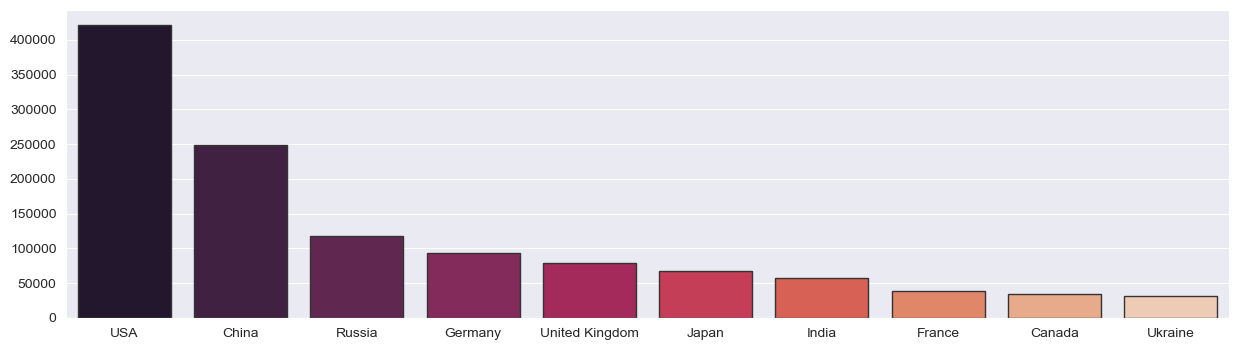

In [36]:
plt.figure(figsize=(15, 4))
sns.set_style("darkgrid")
sns.barplot(
    x=Countries[:10],
    y=Values[:10],
    hue=Countries[:10],        
    palette='rocket',
    edgecolor='.2',
    legend=False                
)


In [ ]:
# Insight 2 Analysis of the trend of emission of India over the past 10 years

In [38]:
data_India = df[df["Country"] == "India"]

In [42]:
data_India = data_India.sort_values(by = "Year", ascending = False)
data_India.head(5)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
25567,India,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,0.0,1.925088
25566,India,2020,2445.011942,1588.060207,603.602160,127.635380,122.908202,2.805994,0.0,1.750956
25565,India,2019,2626.459473,1677.653708,674.011463,128.675994,143.664137,2.454171,0.0,1.898949
25564,India,2018,2600.446463,1677.600364,655.190293,126.201229,138.964893,2.489684,0.0,1.899518
25563,India,2017,2434.867906,1560.988150,631.087430,118.922003,121.047241,2.823083,0.0,1.798018


In [43]:
India_past_10 = data_India.iloc[:10,:]
India_past_10

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
25567,India,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,0.0,1.925088
25566,India,2020,2445.011942,1588.060207,603.602160,127.635380,122.908202,2.805994,0.0,1.750956
25565,India,2019,2626.459473,1677.653708,674.011463,128.675994,143.664137,2.454171,0.0,1.898949
25564,India,2018,2600.446463,1677.600364,655.190293,126.201229,138.964893,2.489684,0.0,1.899518
25563,India,2017,2434.867906,1560.988150,631.087430,118.922003,121.047241,2.823083,0.0,1.798018
25562,India,2016,2383.815964,1529.990408,613.165557,113.622467,123.281311,3.756221,0.0,1.780779
25561,India,2015,2270.766191,1487.461399,554.788779,106.870633,117.507915,4.137466,0.0,1.716550
25560,India,2014,2187.343005,1447.354894,511.166221,109.467500,115.824896,3.529493,0.0,1.673244
25559,India,2013,2037.415492,1319.998650,495.642138,110.689227,107.819842,3.265635,0.0,1.578007
25558,India,2012,1962.594350,1244.606043,488.554125,125.604798,100.237156,3.592229,0.0,1.539909


<Axes: xlabel='Year', ylabel='Total'>

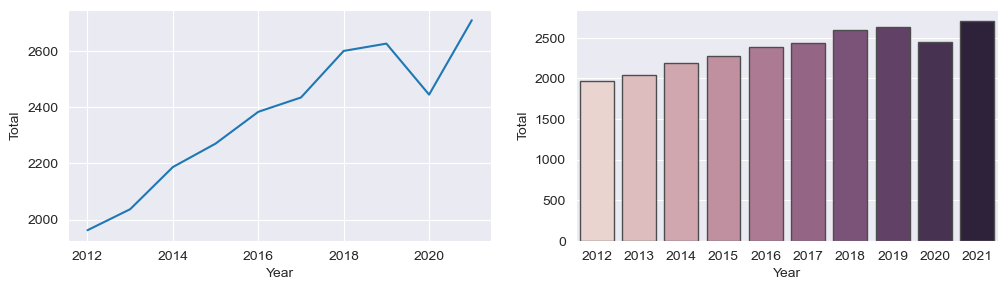

In [45]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.lineplot(x = "Year", y = "Total", data = India_past_10)
plt.subplot(122)
sns.barplot(x = "Year", y = "Total", data = India_past_10, hue = "Year", legend = False, edgecolor = '.3')

In [ ]:
# Insight 3 Top 5 countries with the most average emissions over the last 5 years

In [46]:
last_5_years = df["Year"].unique()[-5:]
last_5_years

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

In [47]:
df_last_5_years = df[df["Year"].isin(last_5_years)]

In [48]:
df_last_5_years.head(5)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
267,Afghanistan,2017,9.867969,3.447824,6.074912,0.300448,0.044785,0.0,0.0,0.276852
268,Afghanistan,2018,10.818048,3.847200,6.620848,0.293120,0.056880,0.0,0.0,0.294876
269,Afghanistan,2019,11.081621,3.954767,6.842956,0.245569,0.038329,0.0,0.0,0.293401
270,Afghanistan,2020,11.681766,4.150072,7.219776,0.251244,0.060674,0.0,0.0,0.299746
271,Afghanistan,2021,11.874211,4.203536,7.419570,0.238847,0.012259,0.0,0.0,0.296119


In [49]:
df_last_5_years.groupby("Country").mean()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Afghanistan,2019.0,11.064723,3.920680,6.835612,0.265846,0.042585,0.000000,0.0,0.292199
Albania,2019.0,4.968669,0.315110,3.462757,0.146396,1.034552,0.009855,0.0,1.730758
Algeria,2019.0,173.720269,1.082935,55.989704,88.717777,11.374407,16.555446,0.0,4.071328
Andorra,2019.0,0.468345,0.000000,0.468345,0.000000,0.000000,0.000000,0.0,6.138160
Angola,2019.0,22.108011,0.000000,14.072893,2.220086,1.082656,4.732377,0.0,0.686596
...,...,...,...,...,...,...,...,...,...
Viet Nam,2019.0,300.636439,164.663014,66.879782,17.199134,50.477312,1.417197,0.0,3.135147
Wallis and Futuna Islands,2019.0,0.026366,0.000000,0.026366,0.000000,0.000000,0.000000,0.0,2.244810
Yemen,2019.0,11.672674,0.300021,9.142180,0.277944,0.663596,1.288932,0.0,0.369824


In [54]:
df_last_5_years.groupby("Country").mean().sort_values(by = "Total", ascending = False)[:5]

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
China,2019.0,10706.912541,7516.915468,1566.370829,630.729328,816.599957,3.975617,172.321341,7.538817
USA,2019.0,5113.957130,1103.335566,2264.380937,1608.765509,40.416206,71.156861,25.902051,15.323094
India,2019.0,2563.293882,1661.322865,637.207893,126.977083,135.117143,2.668897,0.000000,1.854506
Russia,2019.0,1685.347819,383.693469,397.468751,812.469477,20.682133,54.372447,16.661543,11.582385
Japan,2019.0,1109.481759,430.176753,416.087098,229.601174,25.243773,0.383511,7.989450,8.823615


In [56]:
avg_emissions = df_last_5_years.groupby("Country").mean().sort_values(by = "Total", ascending = False)[:5][["Year", "Total", "Per Capita"]].reset_index()

In [57]:
avg_emissions

,Country,Year,Total,Per Capita
0,China,2019.0,10706.912541,7.538817
1,USA,2019.0,5113.957130,15.323094
2,India,2019.0,2563.293882,1.854506
3,Russia,2019.0,1685.347819,11.582385
4,Japan,2019.0,1109.481759,8.823615


<Axes: xlabel='Total', ylabel='Per Capita'>

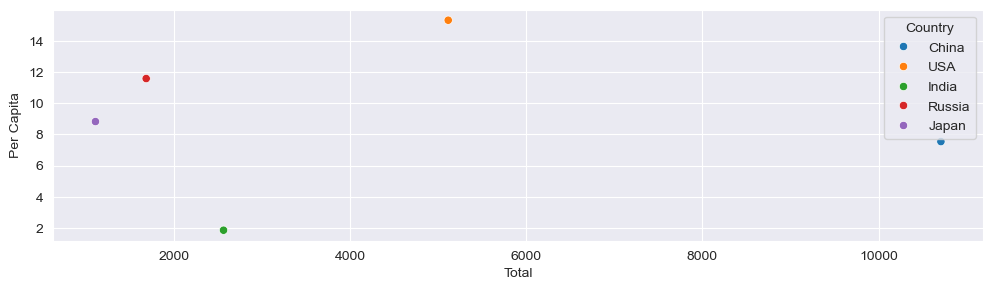

In [58]:
plt.figure(figsize=(12,3))
sns.scatterplot(x = "Total",
                y = "Per Capita",
                data = avg_emissions,
                hue = "Country")